---
# A/B Testing 
Lets think about the following scenario:
* you run a software-as-a-service startup 
* have a landing page where you get people to signup
* "Signup" = enter email address and click signup button
* Not everyone who visits your site will sign up
* Conversion rate = proportion of people who sign up 

#### Now lets suppose that your lead marketer has identified problems with your landing page (not responsive, slow load time, bad copy, etc)...
* They create a new, possibly better page
* you as a data scientist, want to measure which page is better, using data and math
* Recall confidence interval concept
* Why did we talk about confidence intervals? Because we knew intuitively that 1/10 is not as accurate as 10/100, which is not as accurate as 100/1000 (even though these all yield the same click rate/conversion rate)
* Because of this, even if page1 gets 1/10 clicks, and page2 gets 2/10 clicks, it is not necessarily worse! 
* However, if page1 gets 10/100 clicks, and page2 gets 20/100 clicks, now we are more certain that page2 is superior
* But again, **how can we quantify this?**

#### In Frequentist statistics
* the answer is to do a traditional statistical test 
* we are going to set up a simple example to get familiar with the terminology, and dive further into detail later on 

## Our example: Are men taller than women?
* In a statistical test you would say: "is the difference in height between men and women statistically significant"
* there is that term signficance again, which we first saw with confidence intervals! Recall we used $\alpha$ to represent it
* we will again use 5%, which is a standard significance level researchers use (1% is also common)
* This highlights a weakness of the method though! We still need to choose a threshold for what we deem to be significant
* To be even more precise, "is the difference in height between men and women statistically significant, at significance level $\alpha$?"

## Hypotheses 
So in statistical testing we have two hypotheses:
* **Null Hypothesis (no difference):**
    * example: no significant difference in mean height between men and women
    * example: no difference in effect between drug and placebo
$$H_0:\mu_1 = \mu2$$
* **Alternative Hypothesis (one sided test):**
$$H_1:\mu_1 > \mu2$$
* **Alternative Hypothesis (two sided test):**
    * example: test if men taller than women OR women taller than men
    * example: test if drug works better than placebo or worse than placebo
$$H_1:\mu_1 \neq \mu2$$

We are going to be doing the two sided test! In other words, our alternative hypothesis will be that the average height of men is not equal to the average height of women. 

---
# Simple A/B Testing Recipe
Continuing with our example of height of men vs women, or drug vs placebo...
* As is typical in frequentist statistics, we will assume data is Gaussian-distributed
* we collected some data, 2 lists of heights- one for men and one for women
$$x_1 = \{x_{11}, x_{12},...,x_{1N}\}$$
$$x_2 = \{x_{21}, x_{22},...,x_{2N}\}$$
* we then create a "test statistic" called "t"

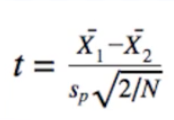

where:

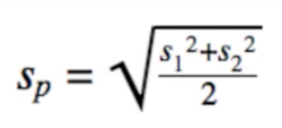

### Note: t in this case can be thought of as the difference between the two means, scaled by a factor of the standard deviation times the sample size

* $s_p$ is the pooled standard deviation (use unbiased estimates for all s - divide by N-1, not N)
* N = size of EACH group (if you have 10 men and 10 women, N = 10)

#### Now lets think back to when we looked at the estimate of a mean...
* it was a sum of random variables, and therefore also a random variable (with a gaussian distribution)
* t is also a function of random variables, therefore also a random variable (note, formally a random variable is a *Function*)
* it can be shown that since t is a random variable, it is **t-distributed**
* we will see t-distribution and other more exotic distributions a lot when studying statistical testing + bayesian methods

## t-distribution
* Looks like a gaussian with fatter tails
* this means that there is more probability weight on the tail ends, compared to the gaussian
* 
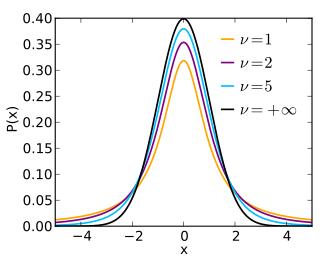

The PDF for the t-distribution looks like: 

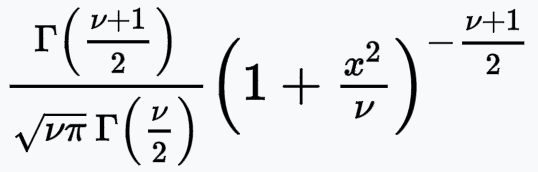

* we will no use it directly in this course
* it has 1 parameter: $\nu$ = the degrees of freedom
* similar to gaussian, it has a mean and scale parameter (but we won't use it)
    * not shown in wikipedia
    * but scipy takes it in as args
* for our statistical test, $\nu$ = 2N -2

## Test Statistic

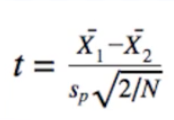

* if mean(X1) = mean(X2) then t = 0
    * this falls in the center of the t distribution
* if mean(X1) >> mean(X2) then t = large #
    * falls in right tail
* if mean(X1) << mean(X2) then t = small # 
    * falls in left tail
* symmetry: doesn't matter if we call men = 1, women = 2, or vice versa 

## Area under t-distribtution
* similar to the problem of finding a confidence interval, we want to find the area under the curve of the t-distribution, so we will need the CDF (use scipy.stats.t.cdf)
* Also remember there are 2 tails of the distribution that we need to consider
    * left - CDF area will be very close to 0
    * right - CDF area will be very close to 1
* so for a significance level $\alpha$ = 0.05, t < -2.776 or t > 2.776
* we call that "statistically significant" difference 

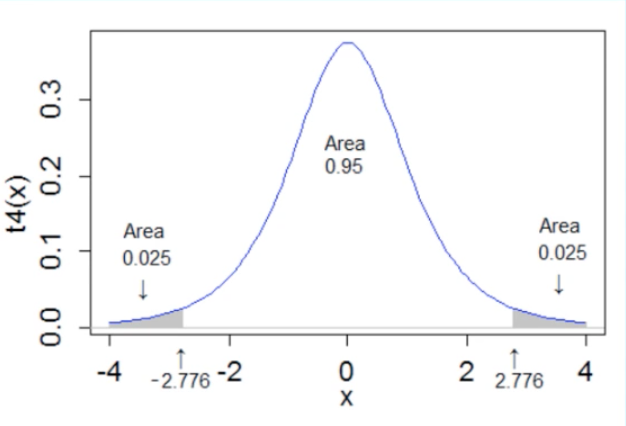

## And we are done! (almost)
* not the whole story in terms of statistics terminology
* algorithmically, we are done - we know how to show statistical significance 

---
# p-values
We just went over an algorithm to determine whether the difference between two groups was statistically significant or not. Well the algorithm is done, but we need some more terminology. In stats, we are looking for one number, which should be very small regardless of which tail we are one. 

## Why are we looking for this very small number?
* What is this small number called? It is called a **p-value**!
* there is a lot of controversy over its use
* Definition: **the probability of obtaining a result equal to or 'more extreme' than what was actually observed, when the null hypothesis is true**

## Rephrase for our example
* If average height of men == average height of women (null hypothesis)
* Then: p-value is the probability of observing the difference we measured (or any larger difference) 
* in other words, if t value (which is proportional to mean(X1) - mean(X2), or mean(X1) - mean(X2) is very large, p-value should be very small 
* Now, we want to keep using our significance level, $\alpha$ = 0.05
* so if p-value < $\alpha$, the difference is statistically significant, and we **reject** the null hypothesis
* otherwise, we CANNOT reject the null hypothesis 
* Note: this does not mean the null hypothesis is true, it just means that we cannot reject it with the data we have collected

## So for our example...
* we want the p-value < 5% = 0.05 
* but the answer we got before (for statistical significance) was: Area < 0.025 OR Area >0.975
* If we get Area > 0.975, take 1 - Area < 0.025
* Now we have  *small number* < 0.025
* multiply by sides by 2
* 2(*small number*) < 0.05
* P-value = 2*small_number = 2*(1-Area)

# Test Characteristics, Assumptions, and Modifications
Lets look at the formula for our test statistic again:

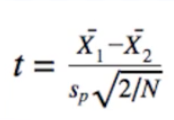

* We already know that if mean(X1) >> mean(X2) or vice versa, t will be larger
* But what about $s_p$ and N?
* t $\propto$ (proportional) $\frac{\sqrt{N}}{s_p}$ 
* this is interesting because it tells us that a larger N leads to a bigger t statistic, *and subsequently* a smaller **p-value**

### Buy why is that reallyy important...?
Well, even if mean(X1) and mean(X2) remain fixed, the significance, a Large N may lead to a significant difference, but a small N may not! 

## Look at Standard deviation 
* bigger $s_p$ leads to a smaller t, and a larger p-value
* in other words if the variance of the two groups is large, it will be harder to find a statistically significant difference 
* there will be too much overlap between the two groups, seen below: 

#### high standard deviation, a lot of overlap, hard to find statistical difference

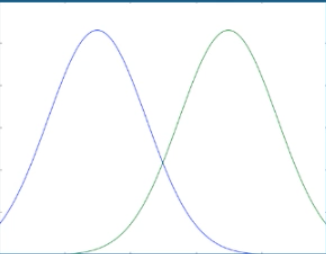

#### low standard deviation, low overlap, easier to find statistical difference

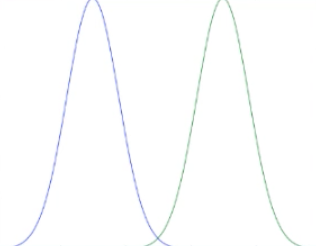

## standard deviation vs N
* the test statistic is proportional to $\frac{\sqrt{N}}{s_p}$ 
* this leads to the same situation as the confidence interval
* t grows slowly (square root) with N
* t decreases faster (inversly proportional) with $s_p$

## "Small" Sample sizes? 
* people in online forums often make comments like: 
> "This study *only* has 20 participants, it's a garbage result!"
* Now that you know how the t-statistic is calculated, can you see that logic doesn't follow!?
* **t depends on N** if N is small, t is smaller, and the p-value is bigger
* since statistical significance is a function of N, it already takes sample size into account!
* Therefore it is not correct to say that a small value of N makes a finding "false"!

## Pooled Standard deviation
* Recall: N is the size of EACH group
* What if each group is of a different size? Take a weighted combination

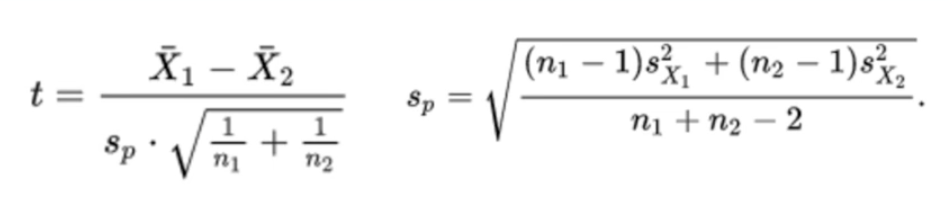

## Another Assumption
* It may not be obvious, but we've assumed that the standard deviation of both groups is the same
* That seems like a pretty strong assumption...
* So there is a modification called **Welch's t-test** that does not make this assumption
* The important thing though is that the steps are the same!
> * find the t statistic
  * find the degrees of freedom
  * calculate the p-value to see if it is significant

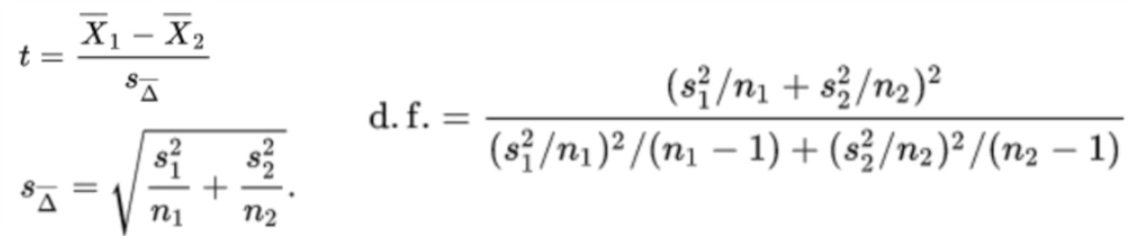

## More assumptions
* we assumed the data was gaussian
* However, a lot of data, including the click through data, is not gaussian (we will see what type of test to use on click data in a later lecture)
* What if we don't want to assume a distribution/don't know what distribution our data comes from?
* There a tests called "non parametric tests"/"distribution free tests" 
* some popular ones are (check scipy):
    * Kolmogorov-Smirnov test
    * Kruskal-Wallis test
    * Mann-Whitney U test
* "API" is the same (similar to how all SKLearn models have fit/predict) 
* less assumptions -> less power -> need "more extreme" difference for statisically significant p-value (remember 1 vs 2 sided test) 

## 1-sided vs 2-sided tests 
* we did not make the 1-sided assumption (even though we already know men are taller than women on average) 
* Effect of 1-sided test on p-value: it's "easier" to show significance because you don't have to multiply area by 2
* sometimes you don't want to do a 1-sided test
> * example: drug testing 
  * you want to test if a drug is better, and also if a drug is worse. 
  * But if you have an effective drug, and you want to test if a new drug is better, you can use a 1-sided test 
  
## Summary
* The point of this process was to show a simple example of how frequentist statistical testing works
> * we generated a test statistic
  * from that we know its distribution
  * look to see if it's at the "extreme" values of the distribution (statistical significance)
  * if it is statistically significant, reject the null hypothesis

---
# t-test in code

### start with our imports

In [1]:
import numpy as np
from scipy import stats

### Generate some data
We will generate 10 data points for each group. `a` is going to be equal to gaussian distributed data of size `N`, with a mean of `2`. Note: here we are using numpy's `random` module, which has a function `randn` that returns a sample from the standard normal distribution. For more info use `shift+tab`. 

In [11]:
N = 10
mean_a = 2
a = np.random.randn(N) + mean_a

`b` is going to be same thing, but with a mean of 0.

In [12]:
mean_b = 0 
b = np.random.randn(N) + mean_b

Note: both `a` and `b` have a variance of 1.

## Create our own t-test
* so we are going to calculate the variance of `a`
* by default numpy does the MLE of the variance (this can be done because we know the mean), which is dividing by `N`
* however, we want to unbiased estimate, that divides by `N-1`
* we do the same thing for variance of `b`

In [13]:
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

### Calculate pooled standard deviation

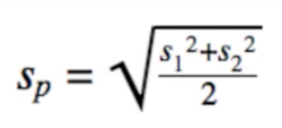

In [14]:
s = np.sqrt( (var_a + var_b)/2 )

### Calculate t-statistic

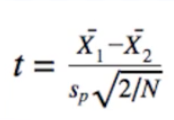

In [15]:
t = (a.mean() - b.mean())/ (s * np.sqrt(2/N) )

### Calculate the degrees of freedom
We need the degrees of freedom so that we can pass it in to the t-distribution CDF: 

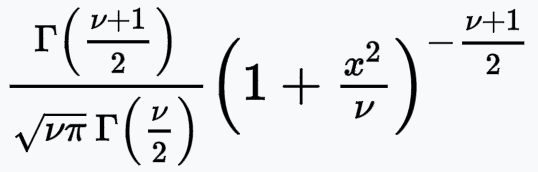

* When dealing with one sample, the degrees of freedom is equal to `N-1`. 
* However, in the case where we have two samples, `a` and `b`, there are two `N's` to consider, so the degrees of freedom is:
$$df = (N_1-1)+(N_2-1)$$
in our case that is:
$$df = 2N - 2 $$

In [16]:
df = 2*N - 2

### Now that we have the t statistic and df...
Lets look at where our t statistic lies on the t distribution

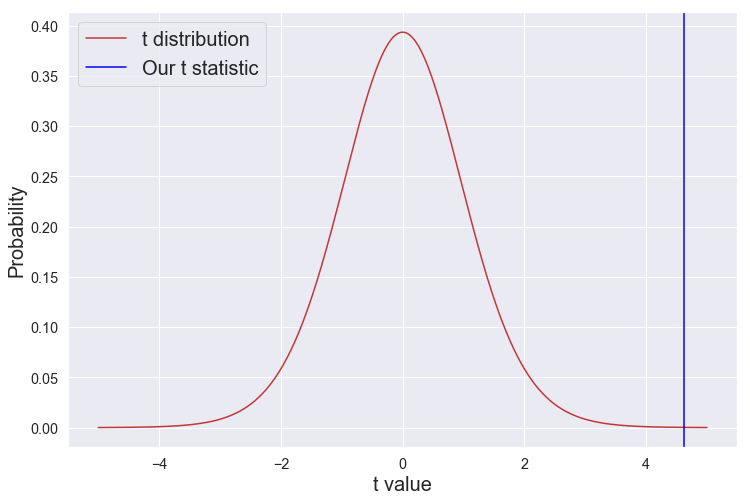

In [17]:
# imports needed for plots
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import seaborn as sns
%matplotlib inline 

# ---------------plotting t dist and our t statistic -------------

# styling
sns.set(style="darkgrid", palette="RdBu")
fig, ax = plt.subplots(figsize=(12,8))

# plotting distribution
x = np.linspace(-5, 5, 1000)
plt.plot(x, stats.t.pdf(x, df))

# plotting t value
plt.axvline(x=t, color="blue")

# setting axes
ax.set_xlabel('t value', fontsize=20)
ax.set_ylabel('Probability', fontsize=20)
ax.tick_params(labelsize="large")
ax.legend(['t distribution', 'Our t statistic'], fontsize=20)

plt.show()

### The p-value - the area to the right of our t statistic
* here we use the t-distribution CDF from the formula above
* we are trying to find the area under the curve to the right of our t statistic
* lets zoom in on our plot from above to find the exact area we are looking for (remember in a continuous probabilty function, there is not probability for a specific point, so we must look for an interval. In this case we will find the probability that we would have observed the values we did *if the null hypothesis was true*, which is the area under the distribution to the right of our t value)

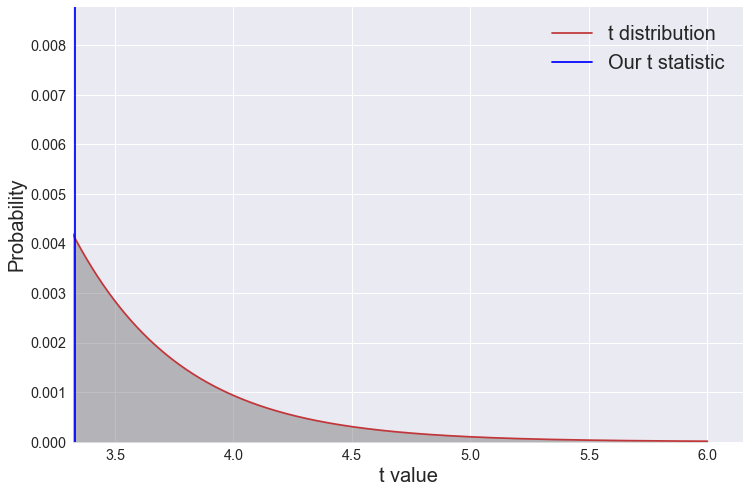

In [9]:
# ---------------zooming in on t dist and our t statistic -------------

# styling
sns.set(style="darkgrid", palette="RdBu")
fig, ax = plt.subplots(figsize=(12,8))

# plotting t distribution
x = np.linspace(3, 6, 1000)
y1 = stats.t.pdf(x, df)
plt.plot(x, y1)

# plotting t value
plt.axvline(x=t, color="blue")

# setting limits so that the area we are finding can be shaded
plt.xlim(t-.005)
plt.ylim(0)
y0 = 0

# shading the area based on limits
plt.fill_between(x, y1, y0, color='grey', alpha='0.5')

# setting axes
ax.set_xlabel('t value', fontsize=20)
ax.set_ylabel('Probability', fontsize=20)
ax.tick_params(labelsize="large")
ax.legend(['t distribution', 'Our t statistic'], fontsize=20)

plt.show()

### Calculate the p-value
* scipy has a stats module that gives us access to a Student’s T continuous random variable.
* we use its `cdf` method in order to calculate how much of the area under the curve lies after our t-statistic 

In [10]:
p = 1 - stats.t.cdf(t, df=df)
print("t:", t,"\tp:", 2*p)

t: 3.32917504292 	p: 0.00373286595609


### Compare with built in scipy function

In [11]:
t2, p2 = stats.ttest_ind(a,b)
print("t2:", t2,"\tp2:", p2)

t2: 3.32917504292 	p2: 0.00373286595609


---
# t-test Exercise 
* Contrary to the previous lectures, we can use this test since even though clicks/no-clicks are not normally distributed, their means are approximately normal due to the Central Limit Theorem! 

In probability theory, the central limit theorem (CLT) establishes that, in most situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed. The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.

# Data File
The first thing we are going to do, is look at the file we will be working with, `advertisement_clicks.csv`. We need to check how many distinct advertisements there are (in order to decide whether or not to use the Bonferroni correction). 

* The first column tells us the advertisement we are looking at
* The second column tells use whether the action was a click or a no-click
* so, for each row we know that the user has seen an advertisment, and a 1 means that they clicked on it, and a 0 means they did not click on it

# Key Point 
* It doesn't matter where the data came from
* E.g. it could be a news article headline
* What would we do in that case? 
* simply replace the header! `news_article_id`, `action`
* This is what we mean when we say "all data is the same" 

# How do I collect this data?
* thats a question on *you* can answer!
* E.g. if you work at a company and your data is stored on hadoop, then you'd write a script to get the data off hadoop (or run your analysis on those files directly)

# Lets begin! 
We can start as always with our imports...

In [12]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot

%matplotlib inline

### Load the data 
And now we can actually load in the data file, `advertisement_clicks.csv`

In [13]:
df = pd.read_csv('advertisement_clicks.csv')

In [14]:
df.head()

,advertisement_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
advertisement_id    2000 non-null object
action              2000 non-null int64
dtypes: int64(1), object(1)
memory usage: 31.3+ KB


In [16]:
df.describe()

,action
count,2000.000000
mean,0.338000
std,0.473147
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


So after using the usual `head`, `describe`, and `info` methods on the data frame we can see that:
* we have 2000 total rows (training examples)
* we are dealing with 2 different advertisements, `A` and `B`

Lets get a quick idea of some metrics associated with `A` and `B`

In [18]:
# create a data frame for both A and B
A = df[df['advertisement_id'] == 'A']
a = A['action']

B = df[df['advertisement_id'] == 'B']
b = B['action']

In [26]:
a.sum()

304

In [166]:
a.mean()

0.30399999999999999

In [167]:
b.mean()

0.372

We can see here that there appears to be some difference between the means of `A` and `B`! Lets get a visualization of this...

### Data Visualization

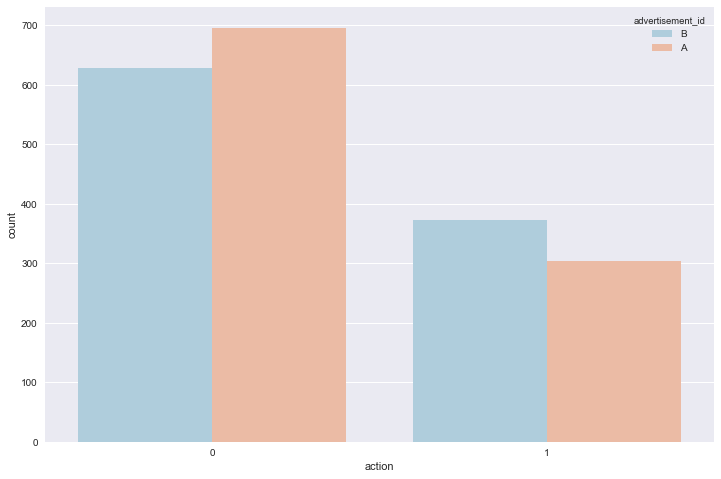

In [168]:
fig, ax = pyplot.subplots(figsize=(12,8))
sns.countplot(x='action', hue='advertisement_id', data=df, palette='RdBu_r')

So at this point we can see that there is a difference between advertisment `A` and `B`- advertisement `B` seems to having a higher click through rate compared to `A`. The question we need to be asking ourselves though is: 
### Is this difference statistically significant?

Well we know exactly how to figure that our now, based on the frequentist method!

### Process to determine statistical significance
>  
* we generate a test statistic
* from that we know its distribution
* look to see if it's at the "extreme" values of the distribution (statistical significance)
* if it is statistically significant, reject the null hypothesis

Note: in this case we are going to want to use **Welches t-test** because our variances are not the same!

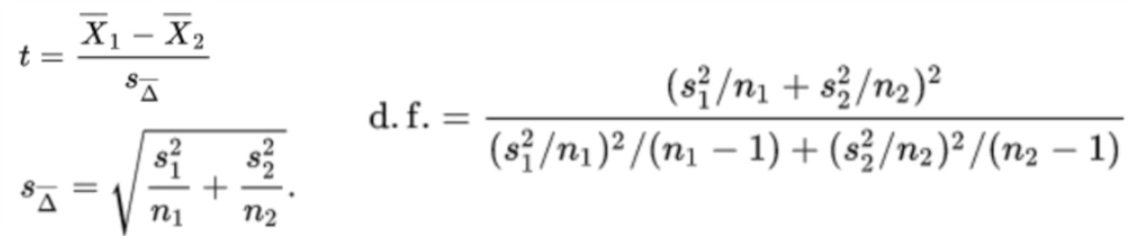

### Start by calculating the pooled standard deviation

In [169]:
N = 1000
s1 = a.std()
s2 = b.std()
s = np.sqrt( (np.power(s1,2)/N) + (np.power(s2,2)/N) )

### Determine our t-statistic 

In [170]:
t = (a.mean() - b.mean()) / s

### Calculate degrees of freedom, which is needed to determine our t-distribution

In [171]:
df = (np.power( ((np.power(s1,2)/N) + (np.power(s2,2)/N)),2)) / ( (np.power(np.power(s1,2)/N,2)/(N-1)) + (np.power(np.power(s2,2)/N,2)/(N-1)) )

### Now that we have a t-statistic and df, lets plot our t-distribution and see where our t-statistic lies

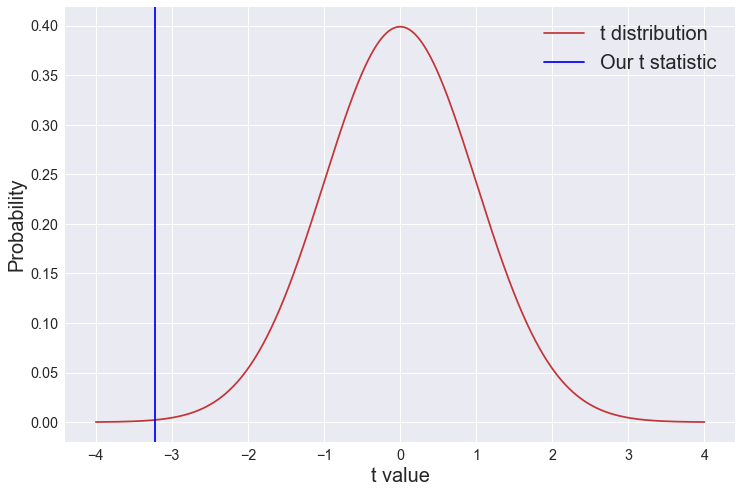

In [172]:
# imports needed for plots
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
# ---------------plotting t dist and our t statistic -------------

# styling
sns.set(style="darkgrid", palette="RdBu")
fig, ax = plt.subplots(figsize=(12,8))

# plotting distribution
x = np.linspace(-4, 4, 1000)
plt.plot(x, stats.t.pdf(x, df))

# plotting t value
plt.axvline(x=t, color="blue")

# setting axes
ax.set_xlabel('t value', fontsize=20)
ax.set_ylabel('Probability', fontsize=20)
ax.tick_params(labelsize="large")
ax.legend(['t distribution', 'Our t statistic'], fontsize=20)

plt.show()

### Now lets determine our p-value! In this case, the area under the t-distribution to the right of our t-statistic
Lets zoom in on our plot from above to find the exact area we are looking for (remember in a continuous probabilty function, there is not probability for a specific point, so we must look for an interval. In this case we will find the probability that we would have observed the values we did *if the null hypothesis was true*, which is the area under the distribution to the right of our t value)

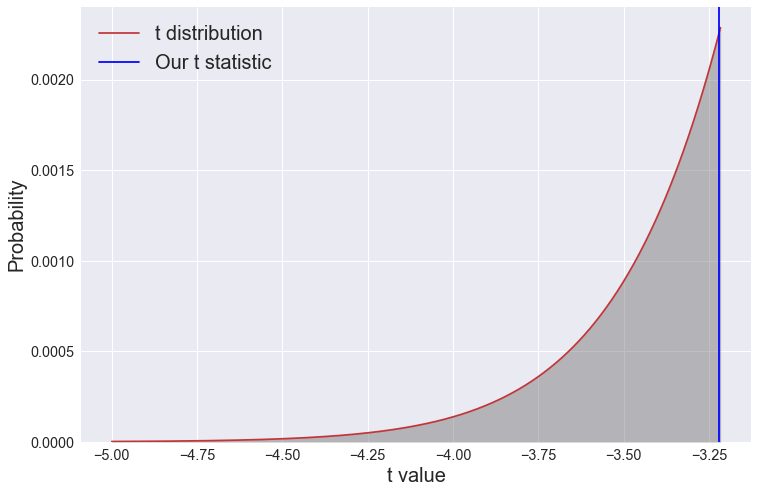

In [173]:
# ---------------zooming in on t dist and our t statistic -------------

# styling
sns.set(style="darkgrid", palette="RdBu")
fig, ax = plt.subplots(figsize=(12,8))

# plotting t distribution
x = np.linspace(-5, t+.005, 1000)
y1 = stats.t.pdf(x, df)
plt.plot(x, y1)

# plotting t value
plt.axvline(x=t, color="blue")

# setting limits so that the area we are finding can be shaded
plt.xlim()
plt.ylim(0)
y0 = 0

# shading the area based on limits
plt.fill_between(x, y1, y0, color='grey', alpha='0.5')

# setting axes
ax.set_xlabel('t value', fontsize=20)
ax.set_ylabel('Probability', fontsize=20)
ax.tick_params(labelsize="large")
ax.legend(['t distribution', 'Our t statistic'], fontsize=20)

plt.show()

### Calculate the p-value
* scipy has a stats module that gives us access to a Student’s T continuous random variable.
* we use its `cdf` method in order to calculate how much of the area under the curve lies after our t-statistic 

In [174]:
p = stats.t.cdf(t, df=df)
print("t:", t,"\tp:", 2*p)

t: -3.2211732138 	p: 0.0012972410374


### Compare with built in scipy function

In [175]:
t2, p2 = stats.ttest_ind(a,b)
print("t2:", t2,"\tp2:", p2)

t2: -3.2211732138 	p2: 0.00129719054671


# Conclusion 
We arrived at a p-value that is equivalent to that of the scipy `ttest_ind` function! We can see that if the null hypothesis:
$$\mu_A = \mu_B$$
were true, our observations would have been made only 0.13% of the time. Because this is less than our significance level, $\alpha = 5%$, we are able to reject the null hypothesis and say with confidence that advertisement `B` is more effective than advertisement `A`!

---
# 0.01 vs 0.011 - Why Should We Care?
* When doing A/B Testing, you will see CTR/Conversion Rates: 1%, 2%
* Differences between 2 groups can be 0.1% or smaller
* So the question comes up: **why bother?**
* Is it worth the engineering effort to improve??

### Answer: Maybe
* You need to do an analysis and determine your break even point to see if it is actually even worth it
* Lets look at an example:

> 
* say your site has 1 million visitors/day 
* 1% of your visitors buy your product worth \$20
* So, you make \$200,000 per day
* If you increase to 1.1%, now you make \$220,000 per day
* Is that worth it or not? 

## Small difference, Big effect 
* doesn't matter how small differences are
* Remember, p-values takes N, std dev, and difference into account
* You can do further analysis to determine if change is worth it 

# A/B Test for Click Through Rates (Chi-Squared Test)
* We now know one test, lets look at another (more complex) one
* this works for click through rates (not gaussian but bernoulli)
* Works for any categorical variables where we count things
    * this test works for a contingency table 

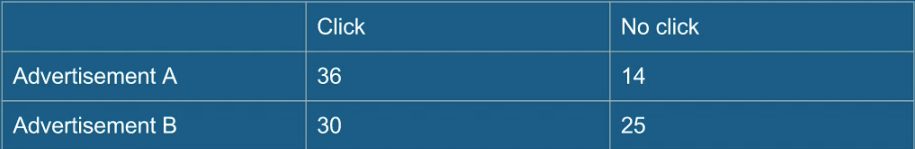

### Goal: Determine if the difference in click through rate between Advertisment A and Advertisement B is statistically significant 

Okay so once we have the above table, we calculate what is called the **Chi-Square Test Statistic**.

## Chi-Square Test Statistic
* $\chi^2$ test statistic
* it is called this, of course, because it is chi-square distributed. Remember, before we calculated the **t-statistic** and it was t-distributed
* Like the t-distribution, the chi-square distribution's main parameter is the degrees of freedom
* like t, it also has a location and scale, which is not listed in the wikipedia entry (but is available in scipy) - default: loc = 0, scale = 1

## Chi-Square Test Statistic Calculation

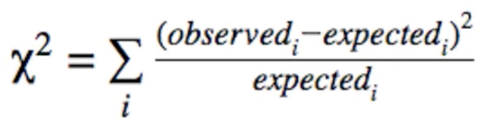

* $i$ is equal to every cell of the table (4 in our current case) 
* the $i$ index's a cell in the table 
* so for example, to start, it is going to refer to row 1 column 1 
* i = (ad A, click)

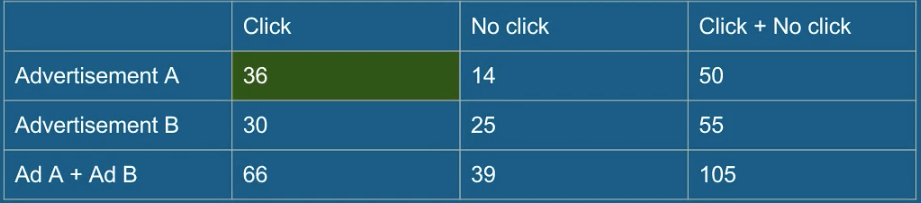

* here, the observed value:
$$observed_i =36$$
* and the expected value: 
$$expected_i = (number \; of\;times\;ad\;A\;is\;shown)*p(click) = 50 * \frac{66}{105} = 31.429$$
where:
$$p(click) = \frac{total\;number\;of\;clicks}{total\;number\;of\;impressions}$$

Similarly, if we want to estimate the number of no clicks for advertisement A...

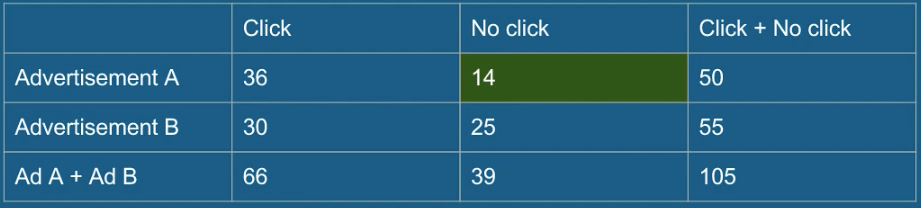

Now i = (ad A, no click). We can see that:
$$observed_i =14$$
* and the expected value: 
$$expected_i = (number \; of\;times\;ad\;A\;is\;shown)*p(no\;click) = 50 * \frac{39}{105} = 18.571$$
where:
$$p(no\;click) = \frac{total\;number\;of\;no\;clicks}{total\;number\;of\;impressions}$$

So we can go through that process for each of the 4 cells in the contingency table, and use the chi-squared statistic equation to determine our final value. In this case:

$$\frac{(36-31.429)^2}{31.429}+\frac{(14-18.571)^2}{18.571}+\frac{(30-34.571)^2}{34.571}+\frac{(25-20.429)^2}{20.429} = 3.418$$

## What do we do now that we have the Chi-Square Test Statistic?
* test statistic is always positive, and would get larger when the data strays from the average, a large chi-square test statistic would be significant 
* It will be extreme when *observed* is far away from *expected*
* So $\chi^2$ is large
* So $1-CDF(\chi^2)$ gives us a "small number"
* this small number is the p-value
* As is typical, if $p-value < \alpha$, then ad A and ad B are significantly different 

## Chi-Square Distribution

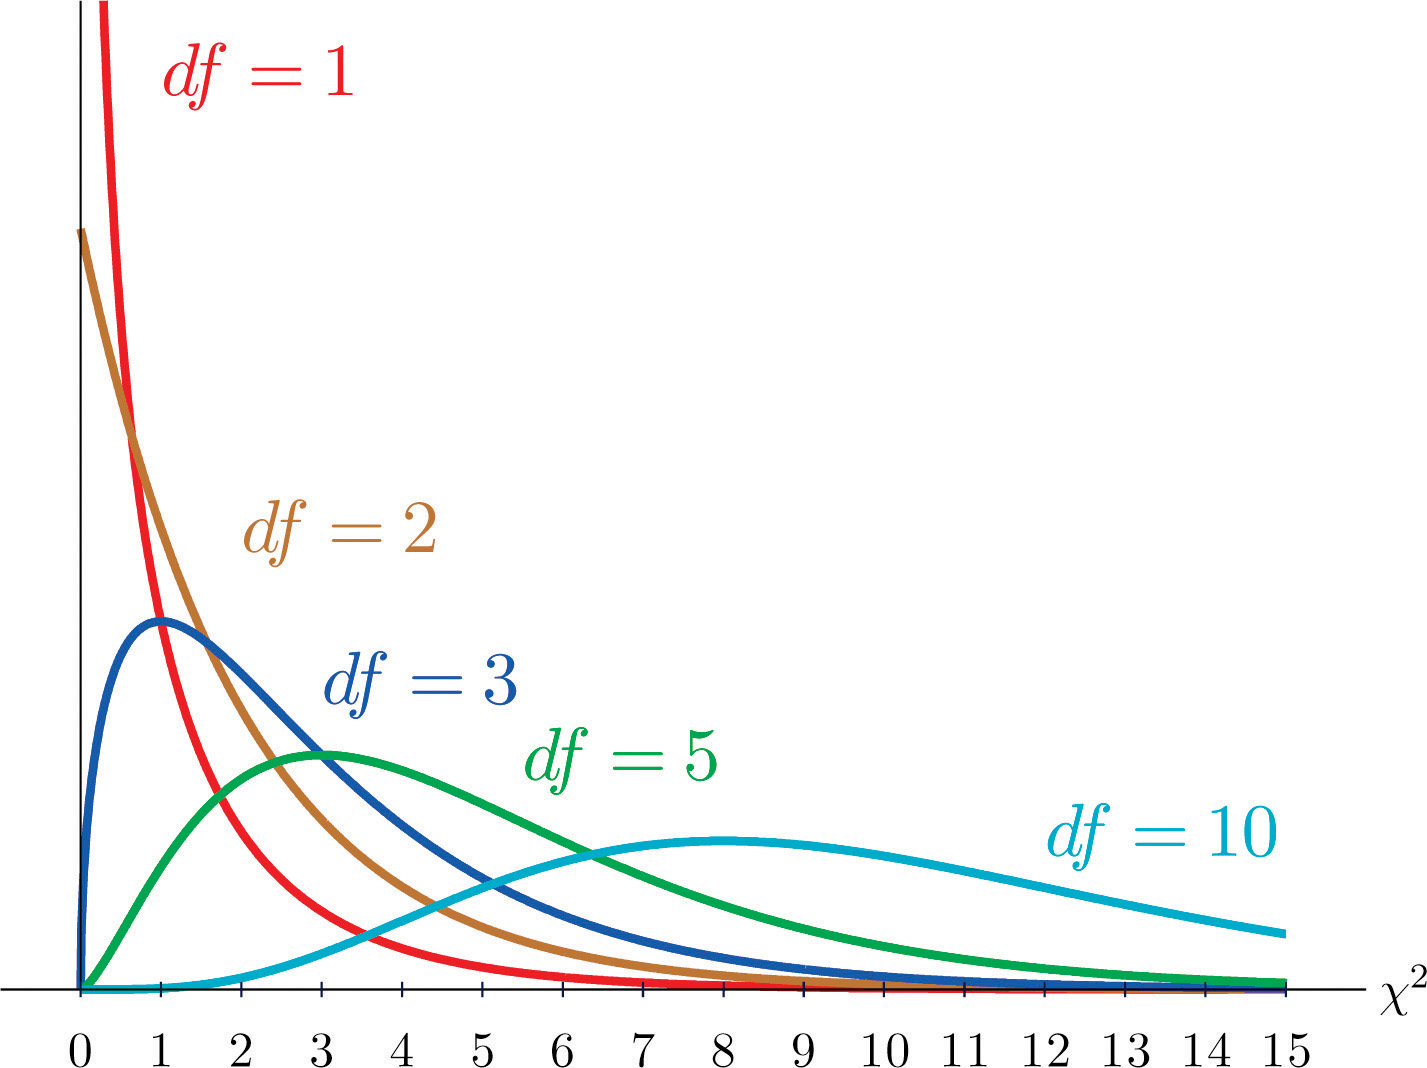

## Chi-Square Shortcut
This formula can also be used to find the chi-square test statistic for a 2x2 contingency table!

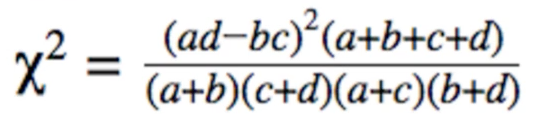

## Scipy Method
This process is built in to scipy! It would look like: `scipy.stats.chi2_contingency(Table, correction=False)`. Now what is correction? 

## Approximations
* Chi-square test statistic 'asymptotically' approaches the chi-square distribution
* i.e. when N = $\infty$
* This is the same situation as the CLT
* In other words, the same situation we have when estimating the mean of a random variable 
* it is only exact when N = $\infty$
* What this also means is that there are other tests you can do for the same data set, to get the same type of answer, and there are corrections you can make to the plain chi-square test as well
* for example, in scipy you will see that by default the chi-square test makes the Yates correction 
* and there also is Fisher's exact test (different test, same data)
* all are plug and play

---
# CTR A/B Test in Code: Chi-Square Test
* focus: how does the p-value change as we collect each sample?
* Does the p-value give us a definitive answer to our question?
* We are interested in what the drawbacks of using this type of statistical test might be. This will become important in the future when we talk about Bayesian A/B testing 

### Start with our imports

In [176]:
# math imports
import numpy as np
from scipy.stats import chi2
import math

# plotting imports
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline

### Create a class to generate our data

In [177]:
class DataGenerator: 
    
    # p1 and p2 are probability of click for group 1 and group 2 
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2
    
    # function to return result of whether person clicked on Ad1 or Ad2 (1 = click, 0 = no click) 
    def next(self): 
        click1 = 1 if (np.random.random() < self.p1) else 0
        click2 = 1 if (np.random.random() < self.p2) else 0
        return click1, click2 

### Create function to get p value, takes in contingency table as a parameter

In [178]:
def get_p_value(T): 
    det = T[0,0]*T[1,1] - T[0,1]*T[1,0]
    
    # calculate chi square test statistic using shortcut
    c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:,0].sum() / T[:,1].sum()
    
    # calculate p value using 1 - cdf(test statistic value)
    p = 1 - chi2.cdf(x=c2, df=1)
    return p

### Create function to run experiment

In [179]:
def run_experiment(p1, p2, N):
    data = DataGenerator(p1, p2)
    p_values = np.empty(N)
    T = np.zeros((2, 2)).astype(np.float32)
    for i in range(N):
        c1, c2 = data.next()
        # incrementing the column of based on whether it was a click or no click
        T[0,c1] += 1
        T[1,c2] += 1
        if i < 10: 
            p_values[i] = None
        else: 
            p_values[i] = get_p_value(T)
    
    print(T)
    # -----------------------plotting ---------------------------
    # styling
    sns.set(style="darkgrid", palette="RdBu")
    fig, ax = plt.subplots(figsize=(12,8))
    
    # setting axes
    ax.set_xlabel('N (sample size)', fontsize=20)
    ax.set_ylabel('p-value', fontsize=20)
    ax.tick_params(labelsize="large")
    ax.legend(['P values', 'P value threshold'], fontsize=20)
    
    # plot p value for each iteration 
    plt.plot(p_values)
    # plot threshold
    plt.plot(np.ones(N)*0.05)

[[ 17980.   2020.]
 [ 17746.   2254.]]


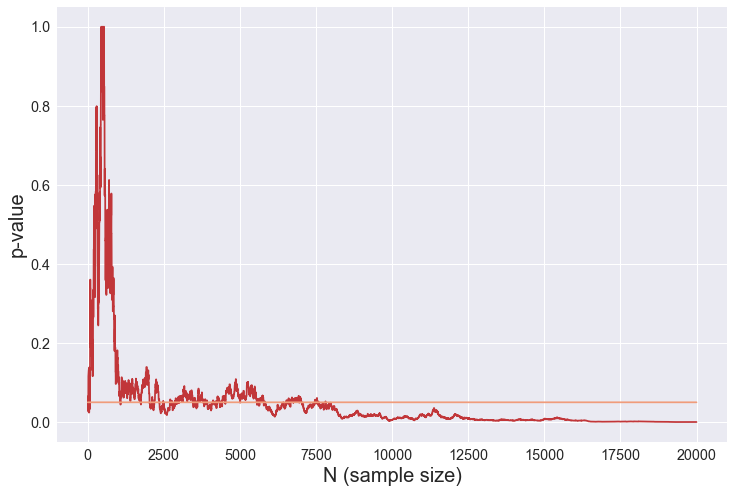

In [180]:
run_experiment(0.1, 0.11, 20000)

### What can we see from this...
If we run the `run_experiment` cell several times, we can see that the p value can be problematic. Sometimes we can find a value that is significant, and then as the sample size increases it changes to not significant. The same can happen where initially the p value is not significant, and as the sample size increases it becomes significant. 

---
# Chi-Square Exercise 
We are going to use the same data from the t-test exercise: `advertisement_clicks.csv`. 

## Key Concept
* previously we have discussed "all data is the same"
* E.g. advertising data/logos/website designs/anything you want to test
* Now we can see that "all algorithm interfaces are the same"
* The data doesn't need to change! 

## In Supervised Machine Learning
* This is why you can use different algorithms on the same data
> * `X , Y = load_some_data()`
  * `neural_network.fit(X, Y)`
  * `random_forest.fit(X, Y`

We can see that in the above situation we can quickly see if the random forest or neural network perform better!

## Goal: Determine whether CTRs are statistically significantly different

### Start with imports 

In [181]:
import numpy as np
import pandas as pd
from scipy.stats import chi2, chi2_contingency

### Load the data 
And now we can actually load in the data file, `advertisement_clicks.csv`

In [182]:
df = pd.read_csv('advertisement_clicks.csv')

# create a data frame for both A and B
A = df[df['advertisement_id'] == 'A']
a = A['action']

B = df[df['advertisement_id'] == 'B']
b = B['action']

### Create function to get p value (manually)

In [183]:
def get_p_value(T):
    det = T[0,0]*T[1,1] - T[0,1]*T[1,0]
    c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:,0].sum() / T[:,1].sum()
    p = 1 - chi2.cdf(x=c2, df=1)
    return p

### Create Contingency Table

In [196]:
# contingency table
#        click       no click
#------------------------------
# ad A |   a            b
# ad B |   c            d

# find number of clicks on advertisement A
A_click = a.sum()

# find number of no clicks on advertisement A
A_noclick = a.size - a.sum()

# find number of clicks on advertisement B
B_click = b.sum()

# find number of no clicks on advertisement B
B_noclick = b.size - b.sum()

T = np.array([[A_click, A_noclick], [B_click, B_noclick]])
print("T = \n", T)

T = 
 [[304 696]
 [372 628]]


### Get p value with manually created function `get_p_value`

In [185]:
print(get_p_value(T))

0.00130695027321


### Get p value with `Scipy.stats` function `chi2_contingency`

In [189]:
chi2_contingency(T, correction=False)[1]

0.0013069502732125406

# Conclusion 
We arrived at a p-value that is equivalent to that of the scipy `chi2_contingency` function! We can see that if the null hypothesis:
$$\mu_A = \mu_B$$
were true, our observations would have been made only 0.13% of the time. Because this is less than our significance level, $\alpha = 5%$, we are able to reject the null hypothesis and say with confidence that advertisement `B` is more effective than advertisement `A`!

## Note: When to use t-test vs. Chi-Square test?
	
This is correct, though I think the core of it is actually simple. Use chi-square if your predictor and your outcome are both categorical variables (e.g., purple vs. white). Use a t-test if your predictor is categorical and your outcome is continuous (e.g., height, weight, etc). Use correlation or regression if both the predictor and the outcome are continuous. 

---
# A/B/C/D Testing - The Bonferroni Coefficient
Lets talk about A/B testing when you want to do more than 2 groups. 
* this is a very practical thing to want to do
* for instance you could have 3 or more advertisements you want to test out, or 3 or more different landing pages...

## P-Values
* one thing to know about p-values is that it is possible to get a significant p-value by chance! 
* this means that even if the groups are the exact same (i.e. $\mu_A=\mu_B$) you may receive a p-value less than $\alpha=0.05$
* in fact $\alpha$ is the exact probability of this occuring
* If you run the same experiment twice, does the chance of getting a significant p-value increase? YES!
* It is possible to run a bunch of experiments, then "work backwards" to pick something that had a significant p-value
* One easy solution to testing multiple groups is the **Bonferroni Correction**:
$$\alpha_{new} = \frac{\alpha}{\#\;of\;tests}$$

## Pairwise testing
* One method of comparing multiple groups is to do pairwise testing
* test every group against every other group 
$$\alpha_{new} = \frac{\alpha}{choose(N,2)}$$
* and our p-value then needs to be:
$$pvalue < \alpha_{new}$$
in order to be statistically significant!

## One-vs-the-Rest
* If we have N different groups, we will do N different tests
* To calculate the data that counts for the group "the rest", we sum the data for all of those groups
* So you still have 2x2 tables
* N groups, N tests
$$\alpha_{new} = \frac{\alpha}{N}$$
$$pvalue < \alpha_{new}$$
in order to be statistically significant!

## Post Hoc Testing
* the tests we just described are usually done after the initial test
* E.g. do a chi-square test on an Nx2 contingency table first 
* If that gives us a significant p-value, follow-up with post hoc tests
* Bayesian A/B testing will handle this without any extra work 


--- 
# Statistical Power
* Can we quantitatively define power? 
* Yes!
* Recall our discussion about imbalanced classes 
$$Power = sensitivity $$
$$Power = p(reject \; H_0 \;|\; H_1 \;is\;true)$$

## How do we get to this?
* First recognize that this is like a binary classification problem
* We have two possible truths: 
    * **the null hypothesis is true** 
    * **the alternative hypothesis is true**
* Then we have two possbile predictions:
    * **reject $H_0$**
    * **do not reject $H_0$**
* Note- These predictions are NOT:
    * **accept $H_1$**
    * **accept $H_0$**
* These fragile definitions make frequentist testing undesirable
* It will get lost in translation when communicating with non-technical people 
    
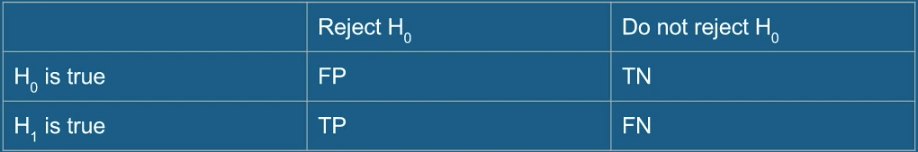

## Definitions
* High power decreases chances of getting False Negative
* False Negative = type 2 error
$$p(False\;Negative) = False\;negative\;rate=\beta$$ 
$$Power = 1 = \beta$$
* False Positive = type 1 error 
* It is highly desirable to just stick to fundamental concepts: 
    * true positive
    * true negative
    * false positive
    * false negative
    
## Why quantify Power?
* "Power analysis" can be used to determine number of samples we should collect for experiment
* 2 key things affect power: **effect size** and **sample size**
* Effect Size = difference between 2 groups
* the large the difference between two groups, the easier it is to measure for a given variance 
* the sample size matters because as we have seen it directly affects the test statistic, thus the p-value as well 

---
# A/B Testing Pitfalls
* we observed how p-value can change as experiment progresses
* you "shouldn't" check it until experiment is over (e.g. pre-determined number of samples have been collected)
* sometimes people stop their experiment early when it reaches significance 
* some software packages even help you do it! 
* We will look at why this is bad

## p-values
> The p-value is defined as the probability of obtaining a result equal to or "more extreme" than that what was actually observed, when the null hypothesis is true

However, 5% of the time, we can get a significant p-value, even though A and B are the same! 

## Scenarios
Lets look at the table below to see different ways that the p-value can progress

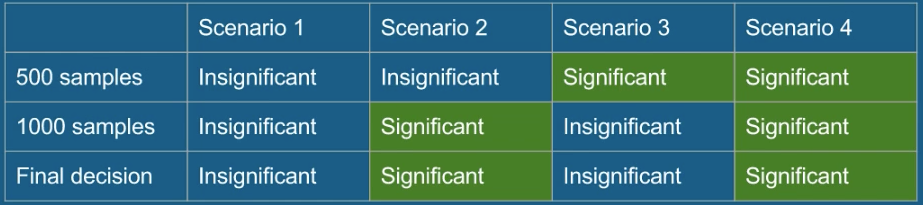

## Stopping Early 

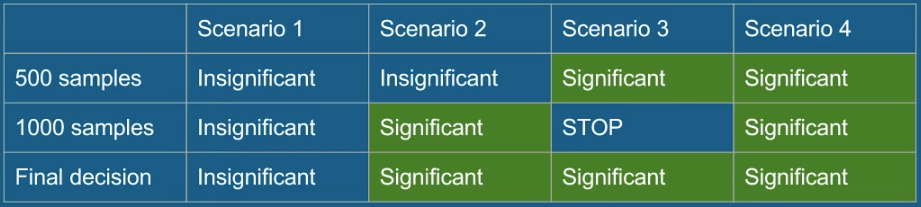

By stopping early, we have increased the proportion of time that we detect significane when there is none! (false positive). Hence it is a bad thing to stop early! We want to choose sample size before the experiment, and stick with it!

## Choosing Sample Size
* general rule of thumb: 

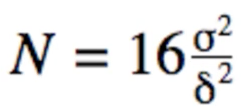

$$\sigma^2 = variance\;of\;data$$
$$\delta = minimum\;difference\;you\;want\;to\;detect$$
* smaller differences are harder to detect, thus require a larger N
* Many "sample size calculators" online

## Frequentist Statistics is Awkward
* The "rules" are counter intuitive
* and at times even unethical 
* Ex. you are testing a drug, you know the science behind it, you are confident it works
* You start your test, its clearly performing well (before the experiment ends)
* Don't you want to give the drug to everyone and heal all the subjects?
* Well frequentist statistics say you can't! 
* Another Example: Conversion Rate. 
* say landing page B leads to more purchases. Can you stop early and make more money? Frequentist statistics say you can't!

## Later
* we will see later how bayesian methods solve this problem
* typically it requires less samples to meet some threshold 
* can stop an experiment at any time and calculate exact probabilities from data collected


---
# Traditional A/B Testing Summary
Let's be honest, traditional statistics is confusing. But the important thing to ask yourself is: "how can I use this on real data?". Answering this question will help you understand it much more effectively!

## Student t-test
* the first thing that we looked at in this section was the t-test
* this is sometimes called the student t-test, because the guy who invented it published it under the pseudonym "student"
* T-test is for comparing 2 different groups of Gaussian distributed data 
* It is typical that people will use this test on data that is non gaussian
* But we also saw "non-parametric" tests that don't make distribution assumptions-may be more suitable
* However, less assumptions means less power! 

## Testing concepts
* we used the t-test to show statistical testing concepts-but the steps are the same no matter what test you use
#### 1) First define null hypothesis and alternative hypothesis
#### 2) Conduct the statistical test
#### 3) The result of the test is to either reject the null hypothesis or not reject the null hypothesis
#### Note: failing to reject the null hypothesis is NOT the same as accepting it
Keep in mind, if there is a difference between A and B, it could mean that you didn't collect enough data for the difference to be detected. Also remember, if the variance is large, you'll need a lot more data to detect the difference! Think of this plot: 


### Low Variance 
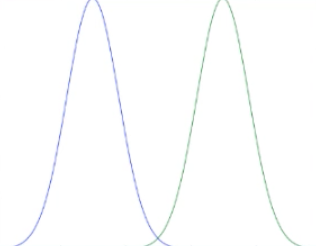

 ### High Variance
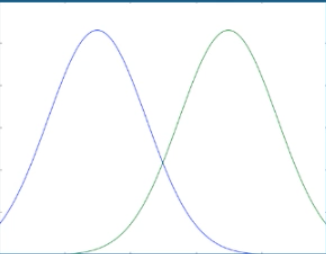

Also remember, that more data means that your test has more power! 

## Test Statistic 
* The next step is to calculate your test statistic! This is a function of random variables, so it is also a random variable and therefore has a **probability distribution**
* With t-test, test statistic is t-distributed 
* with chi-square test, test statistic is chi-square distributed
* in both of these tests, extreme values represent the face that the 2 groups are different 
* Since chi-square distribution is only positive, only 1 tail (on the right)
* For a t-distribution (Gaussian with fat tails), there are 2 tails so we can do a 2-sided or 1-sided test 

## P-value
* the last step is to calculate the p-value
* remember, the more extreme the test statistic, the smaller the p-value 
* researchers will typically use a significance threshold of 5%, or 1%

## Drawbacks
* This can be confusing, even if you are a data scientist
* Imagine how confusing it will be to communicate with a non-data scientist
* Rpeated testing increases chances of finding significant effect when there is none
* Recall - p-value is probability of detecting a difference **even** when 2 groups are the same
* So if you are doing repeated tests or testing multiple groups, don't "go fishing" for significant effects, use the **Bonferroni** correction
* Don't stop test early when you see a significant p-value, it increases chance of False positive! 